# Unsupervised Learning

### Clustering - K-Means

In [5]:
import numpy as np

X = np.zeros((1000, 2), dtype=np.float16)

def generate_cluster(X, i, j, center=(0.0, 0.0)):
    X[i:j] = np.c_[np.random.rand(j - i) * 20 - 10 + center[0], np.random.rand(j - i) * 20 - 10 + center[1]]

generate_cluster(X, 0, 200, (-20, -10))
generate_cluster(X, 200, 400, (-10, 30))
generate_cluster(X, 400, 600, (-10, 70))
generate_cluster(X, 600, 800, (30, 0))
generate_cluster(X, 800, 1000, (50, 60))

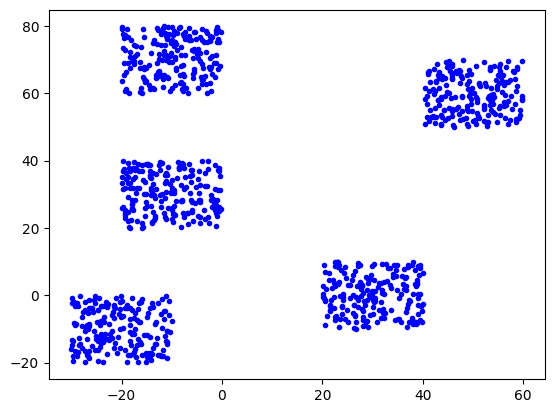

In [6]:
import matplotlib.pyplot as plt

plt.plot(X[:, 0], X[:, 1], "b.")

In [88]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, n_init='auto')
y_pred = kmeans.fit_predict(X)

In [92]:
y_pred

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [93]:
kmeans.cluster_centers_

array([[-10.06072235,  70.45203125],
       [ 29.58335937,   0.53023682],
       [ 49.981875  ,  60.5978125 ],
       [ -9.61817749,  30.03210938],
       [-19.10566406, -10.16651951]])

In [95]:
kmeans.transform(X[:4])

array([[ 82.81184829,  43.86200111,  95.93565443,  42.44833153,
          7.09157431],
       [ 91.98387489,  61.12392973, 112.02291986,  53.09452021,
         13.12814357],
       [ 79.48993637,  50.38362846,  98.28581647,  39.82323908,
          1.96747105],
       [ 72.93163335,  55.10006941,  97.3163876 ,  34.70584883,
         11.31903286]])

In [96]:
kmeans.inertia_

67608.6493160218

In [98]:
kmeans.score(X)

-67608.64931602178

In [102]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, n_init='auto')
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, n_init='auto')

In [104]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.757926268303835

In [105]:
from matplotlib.image import imread

image = imread('ladybug.jpg')

In [106]:
image.shape

(667, 1000, 3)

In [134]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=4, n_init='auto').fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

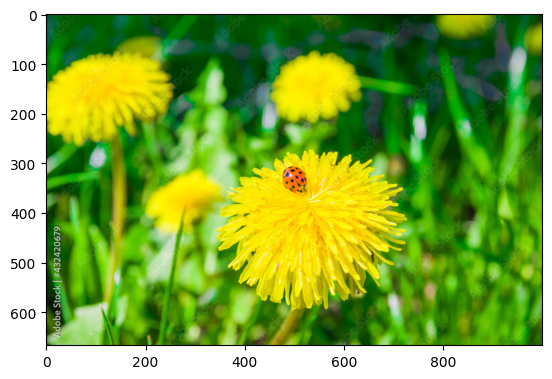

In [135]:
plt.imshow(image)

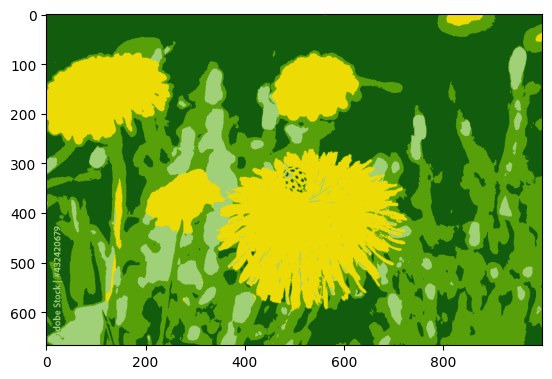

In [136]:
plt.imshow(segmented_img.astype(np.short))

In [137]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

In [138]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [141]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=100000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [142]:
log_reg.score(X_test, y_test)

0.9577777777777777

In [144]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, n_init='auto')),
    ("log_reg", LogisticRegression(max_iter=100000))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, n_init='auto')),
                ('log_reg', LogisticRegression(max_iter=100000))])

In [145]:
pipeline.score(X_test, y_test)

0.9644444444444444

In [147]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(80, 100))
grid_clf = GridSearchCV(pipeline, param_grid=param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END ..............................kmeans__n_clusters=80; total time=   3.4s
[CV] END ..............................kmeans__n_clusters=80; total time=   2.4s
[CV] END ..............................kmeans__n_clusters=80; total time=   2.7s
[CV] END ..............................kmeans__n_clusters=81; total time=   1.5s
[CV] END ..............................kmeans__n_clusters=81; total time=   3.0s
[CV] END ..............................kmeans__n_clusters=81; total time=   3.3s
[CV] END ..............................kmeans__n_clusters=82; total time=   5.7s
[CV] END ..............................kmeans__n_clusters=82; total time=   1.9s
[CV] END ..............................kmeans__n_clusters=82; total time=   2.5s
[CV] END ..............................kmeans__n_clusters=83; total time=   1.5s
[CV] END ..............................kmeans__n_clusters=83; total time=   1.3s
[CV] END ..............................kmeans__n

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, n_init='auto')),
                                       ('log_reg',
                                        LogisticRegression(max_iter=100000))]),
             param_grid={'kmeans__n_clusters': range(80, 100)}, verbose=2)

In [148]:
grid_clf.best_params_

{'kmeans__n_clusters': 99}

In [149]:
grid_clf.score(X_test, y_test)

0.9666666666666667

In [152]:
n_labeled = 50

log_reg = LogisticRegression(max_iter=10000)

log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=10000)

In [153]:
log_reg.score(X_test, y_test)

0.7888888888888889

In [175]:
k = 50
kmeans = KMeans(n_clusters=k, n_init='auto')
X_digits_dist = kmeans.fit_transform(X_train)
representative_digits_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digits_idx]

### DBSCAN

In [176]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

X, y = make_moons(n_samples=1000, noise=0.05)

In [182]:
dbscan = DBSCAN(min_samples=5, eps=0.2)
dbscan.fit(X)

DBSCAN(eps=0.2)

In [186]:
from sklearn.neighbors import KNeighborsClassifier

knn  = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [189]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)
knn.predict_proba(X_new)

array([[0.82, 0.18],
       [0.  , 1.  ],
       [0.76, 0.24],
       [0.  , 1.  ]])

### Gaussian Mixture Model

In [190]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [191]:
gm.weights_

array([0.20009437, 0.20529285, 0.59461278])

In [192]:
gm.means_

array([[-0.75206205,  0.55148805],
       [ 1.73972998, -0.06838275],
       [ 0.49069321,  0.25365072]])

In [193]:
gm.covariances_

array([[[ 0.04948958,  0.05899948],
        [ 0.05899948,  0.08421811]],

       [[ 0.05360735,  0.06388573],
        [ 0.06388573,  0.08945509]],

       [[ 0.16824029, -0.10259369],
        [-0.10259369,  0.28983516]]])

In [194]:
gm.converged_

True

In [195]:
gm.n_iter_

15

In [196]:
gm.predict(X)

array([2, 2, 1, 0, 1, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 0, 1,
       2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 0, 0, 2, 1, 0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 1, 2, 2, 1, 0, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 1, 0,
       0, 2, 2, 1, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 0,
       2, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       1, 0, 0, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 0, 1, 1, 2, 0, 2,
       2, 0, 2, 2, 0, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 0, 2, 0, 1, 2, 0, 2,
       1, 2, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 1, 0, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2,
       0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 0, 2, 1,
       2, 2, 2, 2, 2, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2,

In [197]:
gm.predict_proba(X)

array([[4.36917675e-003, 2.79194780e-186, 9.95630823e-001],
       [1.15229888e-012, 2.06503144e-141, 1.00000000e+000],
       [4.62116780e-227, 9.63791271e-001, 3.62087295e-002],
       ...,
       [3.36733413e-213, 7.07466902e-001, 2.92533098e-001],
       [5.89545968e-135, 2.69860004e-013, 1.00000000e+000],
       [1.88792191e-049, 1.14254478e-068, 1.00000000e+000]])

### Anomaly Detection using GMM

In [200]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

In [201]:
gm.bic(X)

2701.9256974483806

In [202]:
gm.aic(X)

2618.493857705684

In [203]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(X)
np.round(bgm.weights_, 2)

array([0.12, 0.13, 0.12, 0.09, 0.14, 0.18, 0.12, 0.1 , 0.  , 0.  ])

# Exercise - Olivetti

In [9]:
from sklearn.datasets import fetch_olivetti_faces

X, y = fetch_olivetti_faces(return_X_y=True)

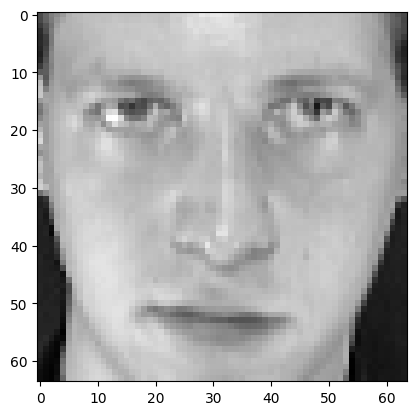

In [18]:
def print_face(X):
    image = X.reshape(64, 64)
    image = image * 255
    plt.imshow(image, cmap=plt.cm.gray)

print_face(X[2])

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)

train_valid_idx, test_idx = next(sss.split(X, y))

X_train_valid = X[train_valid_idx]
y_train_valid = y[train_valid_idx]

X_test = X[test_idx]
y_test = y[test_idx]

sss_test_valid = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=42)

train_idx, valid_idx = next(sss_test_valid.split(X_train_valid, y_train_valid))

X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [22]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


In [60]:
from sklearn.decomposition import PCA

pca = PCA(n_components=40)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.fit_transform(X_valid)
X_test_pca = pca.fit_transform(X_test)

print(X_train_pca.shape, X_valid_pca.shape, X_test_pca.shape)

pca.n_components_

(280, 40) (80, 40) (40, 40)


40

In [61]:
from sklearn.cluster import KMeans

k_range = range(5, 150, 5)
kmeans_per_k = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(X_train_pca)
    kmeans_per_k.append(kmeans)

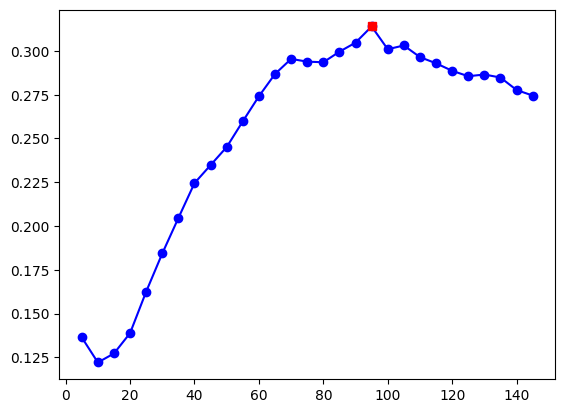

In [62]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_pca, model.labels_) for model in kmeans_per_k]


best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.plot(k_range, silhouette_scores, "bo-")
plt.plot(best_k, best_score, "rs")

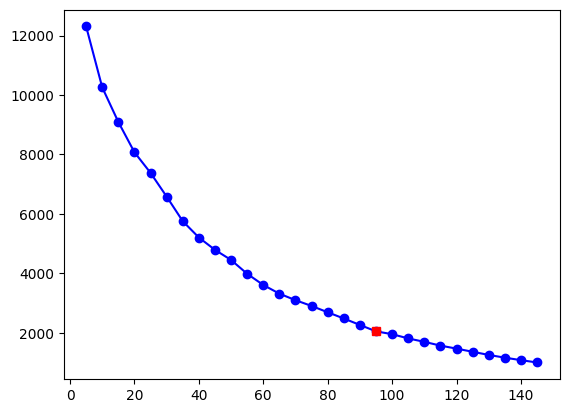

In [63]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.plot(k_range, inertias, "bo-")
plt.plot(best_k, best_inertia, "rs")

In [64]:
best_model = kmeans_per_k[best_index]

Cluster 0


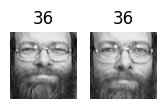

Cluster 1


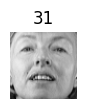

Cluster 2


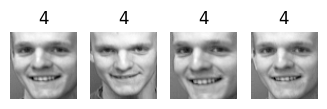

Cluster 3


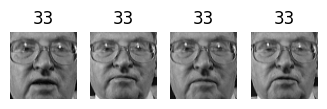

Cluster 4


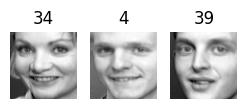

Cluster 5


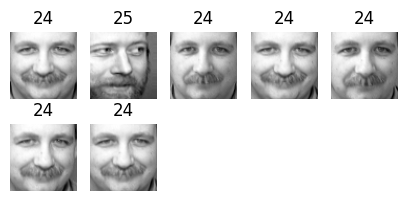

Cluster 6


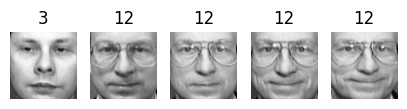

Cluster 7


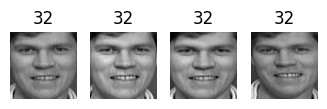

Cluster 8


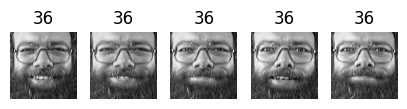

Cluster 9


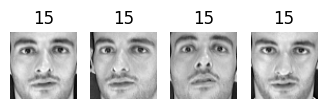

Cluster 10


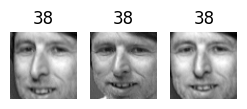

Cluster 11


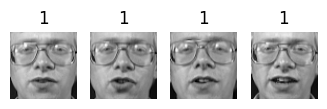

Cluster 12


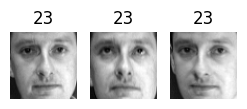

Cluster 13


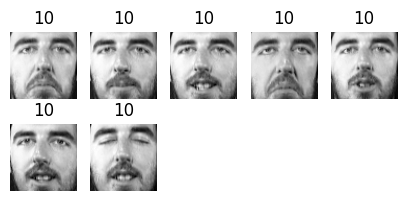

Cluster 14


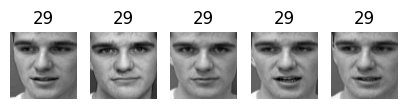

Cluster 15


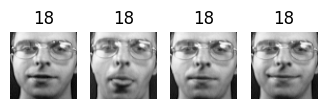

Cluster 16


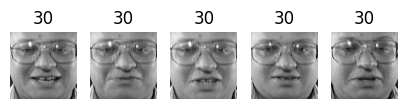

Cluster 17


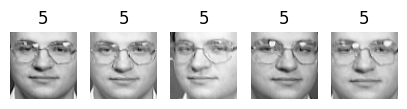

Cluster 18


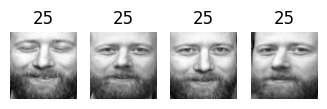

Cluster 19


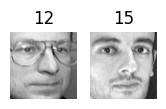

Cluster 20


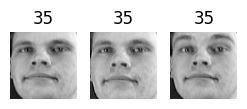

Cluster 21


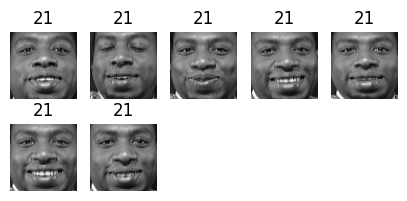

Cluster 22


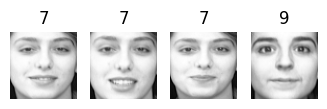

Cluster 23


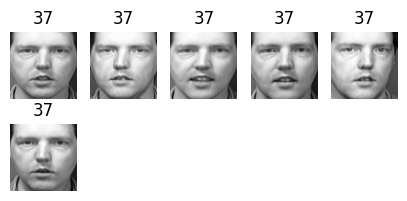

Cluster 24


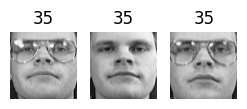

Cluster 25


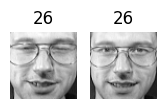

Cluster 26


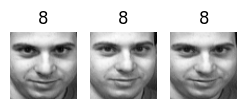

Cluster 27


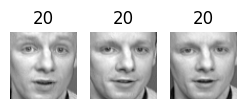

Cluster 28


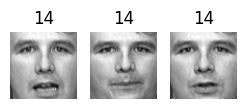

Cluster 29


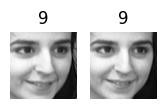

Cluster 30


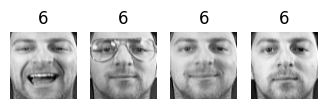

Cluster 31


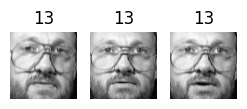

Cluster 32


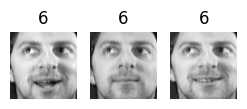

Cluster 33


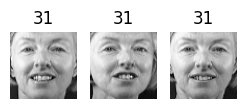

Cluster 34


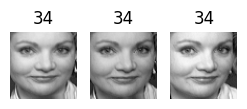

Cluster 35


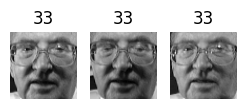

Cluster 36


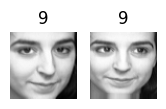

Cluster 37


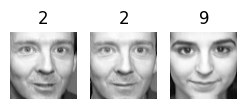

Cluster 38


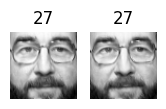

Cluster 39


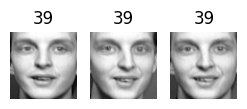

Cluster 40


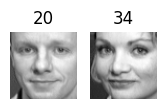

Cluster 41


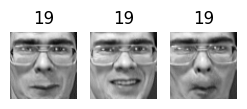

Cluster 42


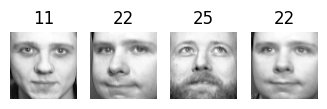

Cluster 43


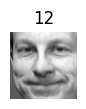

Cluster 44


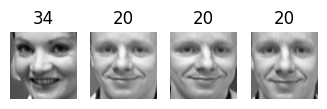

Cluster 45


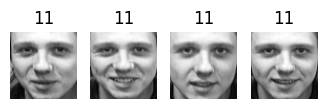

Cluster 46


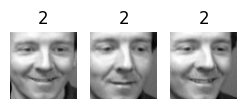

Cluster 47


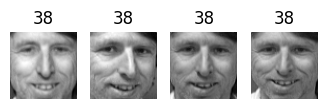

Cluster 48


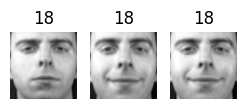

Cluster 49


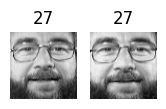

Cluster 50


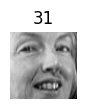

Cluster 51


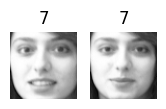

Cluster 52


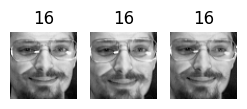

Cluster 53


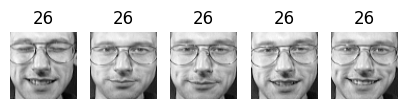

Cluster 54


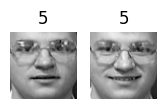

Cluster 55


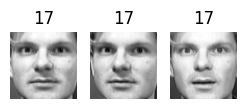

Cluster 56


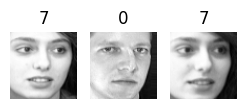

Cluster 57


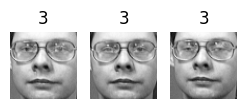

Cluster 58


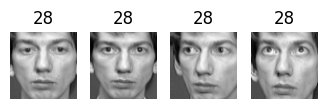

Cluster 59


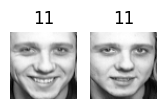

Cluster 60


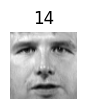

Cluster 61


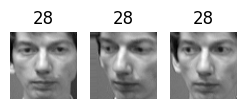

Cluster 62


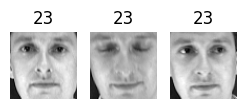

Cluster 63


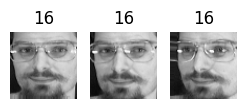

Cluster 64


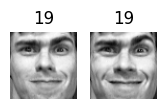

Cluster 65


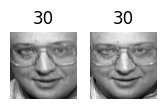

Cluster 66


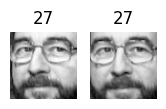

Cluster 67


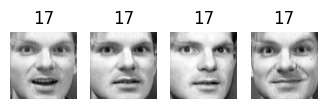

Cluster 68


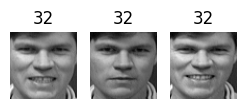

Cluster 69


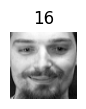

Cluster 70


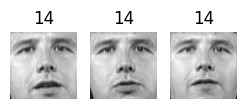

Cluster 71


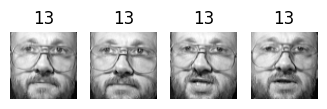

Cluster 72


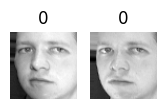

Cluster 73


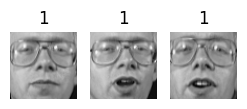

Cluster 74


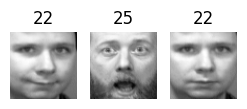

Cluster 75


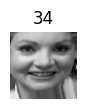

Cluster 76


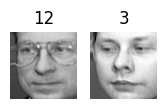

Cluster 77


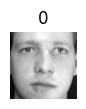

Cluster 78


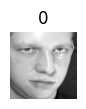

Cluster 79


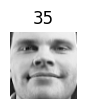

Cluster 80


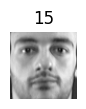

Cluster 81


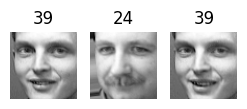

Cluster 82


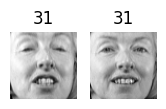

Cluster 83


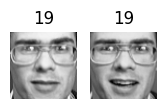

Cluster 84


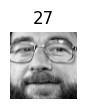

Cluster 85


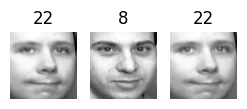

Cluster 86


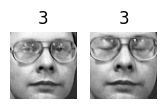

Cluster 87


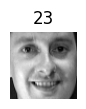

Cluster 88


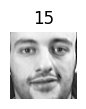

Cluster 89


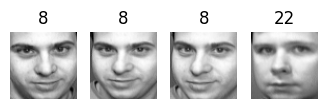

Cluster 90


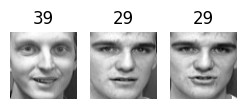

Cluster 91


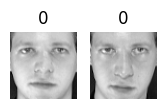

Cluster 92


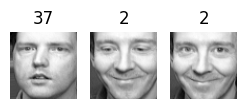

Cluster 93


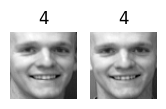

Cluster 94


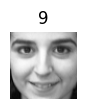

In [65]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_ == cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

In [67]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=150, random_state=42)
rf_clf.fit(X_train_pca, y_train)
rf_clf.score(X_valid_pca, y_valid)

0.1625

In [68]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=40, random_state=42)
y_pred = gm.fit_predict(X_train_pca)

In [69]:
n_gen_faces = 20
gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)
gen_faces = pca.inverse_transform(gen_faces_reduced)

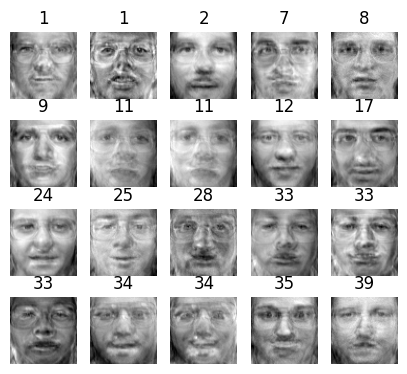

In [70]:
plot_faces(gen_faces, y_gen_faces)